In [1]:
# # drilling data analysis

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import csv
import os
%matplotlib inline

# set the current work directiory
os.chdir('C:/Users/rur4893/Desktop/Real Time Lost Circulation')
#os.chdir('D:/Backup/Documents/GitHub/Simultaneous-Localization-and-Mapping')


# input the basic drilling parameters
m = 0.65                 # flow behavior index
K = 1.85                 # fluid consistency
delta_p = 4.2 * 10**6    # over-pressure
tau_y = 5.62             # yield stress pa
r_w = 311.2/2/1000       # wellbore radius

# load drilling lost circulation data
time = []
lost_volume = []
Drilling_data = np.zeros(shape=(120,2))

with open('LOSS.csv', 'r') as f:
    data = csv.reader(f)
    for row in data:
        time.append(float(row[0]))
        lost_volume.append(float(row[1]))

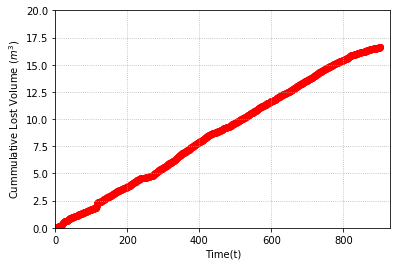

In [26]:
n_time = len(time)
fig, ax1 = plt.subplots()
for i in range(n_time):
    plt.scatter(time[i],lost_volume[i], c = 'r')
    
plt.xlim([0,930])
plt.ylim([0, 20])
plt.xlabel('Time(t)')
plt.ylabel('Cummulative Lost Volume ($m^3$)')
ax1.xaxis.grid(True, which = "Major", linestyle = "dotted")
ax1.yaxis.grid(True, which = "Major", linestyle = "dotted")
plt.show()

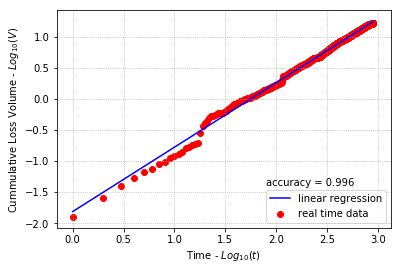

In [23]:
import math

''' plot the log-log figure in the plot'''

fig, ax1 = plt.subplots()
for i in range(n_time):
    plt.scatter(math.log10(time[i]), math.log10(lost_volume[i]), c = 'r')
# be careful of log(x) = ln(x) and log10(x)---base 
plt.xlabel('Time'+ ' - ' +'$Log_{10}(t)$')
plt.ylabel('Cummulative Loss Volume'+ ' - '+'$Log_{10}(V)$')
# plt.title('Log-Log Lost Volume {0}'.format(1))
ax1.xaxis.grid(True, which = "major", linestyle = "dotted")
ax1.yaxis.grid(True, which = "major", linestyle = "dotted")
# calculate log10(volume)
from sklearn.linear_model import LinearRegression

# linear regression for the calculation
# calculate log10(time)
log_time = [math.log10(i) for i in time]
x_time = np.ones(shape=(n_time,2))
x_time[:,0]= log_time
y_volume = [math.log10(i) for i in lost_volume]

# we should use the log data and linear regression
reg = LinearRegression().fit(x_time,y_volume)
p2 =plt.plot(x_time[:,0], reg.predict(x_time), 'b')
a = reg.score(x_time,y_volume)
ax1.annotate('accuracy = %.3f'%a, xy = (1.9,-1.4))
ax1.legend(( 'linear regression','real time data' ), loc = 'lower right')

# here the coefficinet is really small, pls double check
# the calculation according to the inv(X.T@X)X.T = y 
# coefficient = 0.72
plt.show()

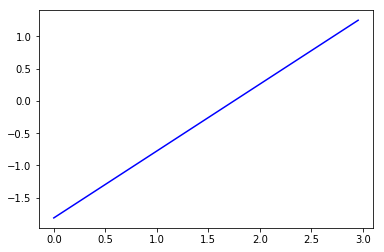

In [18]:
# calculate log10(volume)
from sklearn.linear_model import LinearRegression

# linear regression for the calculation
# calculate log10(time)
log_time = [math.log10(i) for i in time]
x_time = np.ones(shape=(n_time,2))
x_time[:,0]= log_time
y_volume = [math.log10(i) for i in lost_volume]

# we should use the log data and linear regression
reg = LinearRegression().fit(x_time,y_volume)
p2 =plt.plot(x_time[:,0], reg.predict(x_time), 'b')
a = reg.score(x_time,y_volume)
ax1.annotate('accuracy = %.3f'%a, xy = (1.4,-0.95))
ax1.legend(( 'linear regression','real time data' ), loc = 'lower right')

# here the coefficinet is really small, pls double check
# the calculation according to the inv(X.T@X)X.T = y 
# coefficient = 0.72
plt.show()

In [19]:
reg.coef_

array([ 1.03615378,  0.        ])

In [ ]:
# # calculate log10(time)
# t = lambda i: i * (m/(2*m+1))*(1/r_w)**(1/m)
# y = lambda i: i/math.pi/r_w**2
# log_time = [math.log(t(i)) for i in time]
# x_time = np.ones(shape=(n_time,2))
# x_time[:,0]= log_time

# # calculate log10(volume)
# y_volume = [math.log(y(i)) for i in lost_volume]

# # we should use the log data and linear regression
# reg = LinearRegression().fit(x_time,y_volume)
# p2 =plt.plot(x_time[:,0], reg.predict(x_time), 'b')
# a = reg.score(x_time,y_volume)
# ax1.annotate('accuracy = %.3f'%a, xy = (1.4,-0.95))
# ax1.legend(( 'linear regression','real time data' ), loc = 'lower right')

# # here the coefficinet is really small, pls double check
# # the calculation according to the inv(X.T@X)X.T = y 
# # coefficient = 0.72
# plt.show()